Тема “Обучение без учителя”

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()

In [4]:
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(boston["target"], columns=["price"])

y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state = 42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [9]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)


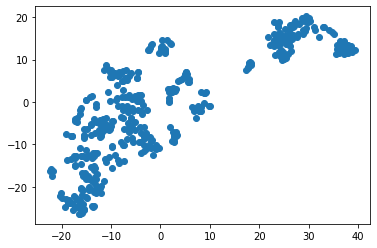

In [18]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.



In [28]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [30]:
train_labels = model.fit_predict(X_train)

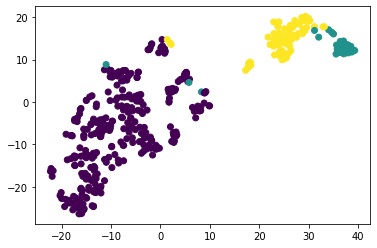

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [46]:
print('Кластер 0: {}'.format(y_train.loc[train_labels == 0].mean()))
print('Кластер 1: {}'.format(y_train.loc[train_labels == 1].mean()))
print('Кластер 2: {}'.format(y_train.loc[train_labels == 2].mean()))

Кластер 0: price    25.168687
dtype: float64
Кластер 1: price    13.196774
dtype: float64
Кластер 2: price    17.442105
dtype: float64


In [47]:
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.40486282828282844
Кластер 1: 14.360380322580648
Кластер 2: 11.745661842105266


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [41]:
test_labels = model.fit_predict(X_test)

In [42]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

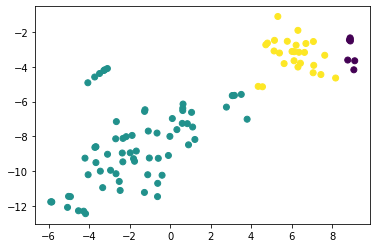

In [43]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)

plt.show()

In [44]:
print('Кластер 0: {}'.format(y_test.loc[test_labels == 0].mean()))
print('Кластер 1: {}'.format(y_test.loc[test_labels == 1].mean()))
print('Кластер 2: {}'.format(y_test.loc[test_labels == 2].mean()))

Кластер 0: price    12.814286
dtype: float64
Кластер 1: price    23.911594
dtype: float64
Кластер 2: price    17.392308
dtype: float64


In [49]:
print('Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Кластер 0: 19.021665714285714
Кластер 1: 0.2464211594202899
Кластер 2: 8.469301923076923
